# 3.3 目标检测大模型简介和应用

## 目标检测
前面两节课程，主要是使用多模态大模型进行图片理解，而如果需要对目标干点啥，则需要获得目标的位置，这个就是目标检测功能，俗称画框bbox。

<img src="img/bbox.png" width='640px' />


### **目标检测（目标识别）简介**
**目标检测**（Object Detection）是计算机视觉的核心任务之一，旨在从图像或视频中识别特定物体并精确定位其位置（通常用边界框表示）。它不仅需要判断物体的类别（如“汽车”“行人”），还需确定其在图像中的具体坐标。与仅分类的**图像分类**和像素级分割的**图像分割**相比，目标检测更注重多物体、多类别的综合定位与识别。

---

#### 1. **传统方法**（2010年前）
• **流程**：滑动窗口生成候选区域 → 手工提取特征（如SIFT、HOG） → 分类器（如SVM）分类。

• **缺点**：计算冗余大、特征鲁棒性差，难以应对复杂场景。

#### 2. **深度学习方法**（2012年-2020年）
• **流程**：
  1. **特征提取**：通过卷积神经网络（CNN）自动学习图像特征；
  2. **边界框回归**：预测物体的位置坐标（中心点、宽高）；
  3. **分类与优化**：结合交并比（IoU）评估预测框与真实框的重叠度，使用非极大值抑制（NMS）消除冗余框。
     
• **主流范式**：
1. **Two-Stage**（双阶段）：首先生成候选区域（如Faster R-CNN的RPN网络），再精细分类和定位，精度高但速度较慢；
2. **One-Stage**（单阶段）：直接预测边界框和类别（如YOLO系列），速度快但小目标检测能力较弱；
3. **YOLO系列**（典型模型）：单阶段模型，实时检测速度快，适合自动驾驶、监控场景；


#### 3. **前沿趋势**

<img src="img/s3-1.png" width='640px' />

1. 基于自注意力机制, Transformer-Based（如DETR），端到端检测无需NMS，但训练资源消耗大。
2. 在大模型驱动下，从传统的封闭集（预定义类别）向开放世界（开域）场景拓展.
3. 能够根据自然语言描述或视觉示例检测任意类别目标，突破了传统检测模型对固定类别的依赖，其核心在于多模态语义对齐和端到端泛化能力的强化.


目标识别大模型排名

<img src="img/dino.jpg" width='800px' />


## 云平台服务

- DINO 开源：https://github.com/IDEA-Research/DINO
- Grounding-DINO 开源：https://github.com/IDEA-Research/GroundingDINO
- DINO 线上服务：https://cloud.deepdataspace.com/playground/grounding_dino
- DINO 服务API：https://cloud.deepdataspace.com/docs#model/dinox


<img src='img/dino-s.png' width='720px' />

定价 Grounding DINO	0.1元/次

注册就有20元，够用200次

token申请：https://cloud.deepdataspace.com/dashboard/token-key


In [1]:
!git clone https://github.com/deepdataspace/dds-cloudapi-sdk.git

Cloning into 'Grounding-DINO-1.5-API'...


In [1]:
!pip install torch

In [66]:
!pip install dds_cloudapi_sdk

In [ ]:
注意，上面安装完成后，可能需要重启下本实验的内核

In [1]:
from dds_cloudapi_sdk.tasks.v2_task import create_task_with_local_image_auto_resize
from dds_cloudapi_sdk import Config
from dds_cloudapi_sdk import Client
from dds_cloudapi_sdk.visualization_util import visualize_result

token = "xxxxxxxxxxxxxxxxx"
config = Config(token)
client = Client(config)

In [2]:
img_path = "./img/p-4-1-s.png"
output_path = "./img"
text = "yellow duck.Cola"
# 2. Create a task with proper parameters. 
task = create_task_with_local_image_auto_resize(
    api_path="/v2/task/dinox/detection",
    api_body_without_image={
        "model": "DINO-X-1.0",
        # "image": infer_image_url, # not needed for local image
        "prompt": {
            "type": "text",
            "text": text
        },
        "targets": ["bbox"],
        "bbox_threshold": 0.25,
        "iou_threshold": 0.8
    },
    image_path=img_path)

# 3. Run the task.
# task.set_request_timeout(10)  # set the request timeout in seconds，default is 5 seconds
client.run_task(task)
image_pil = visualize_result(image_path=img_path, result=task.result, output_dir=output_path)

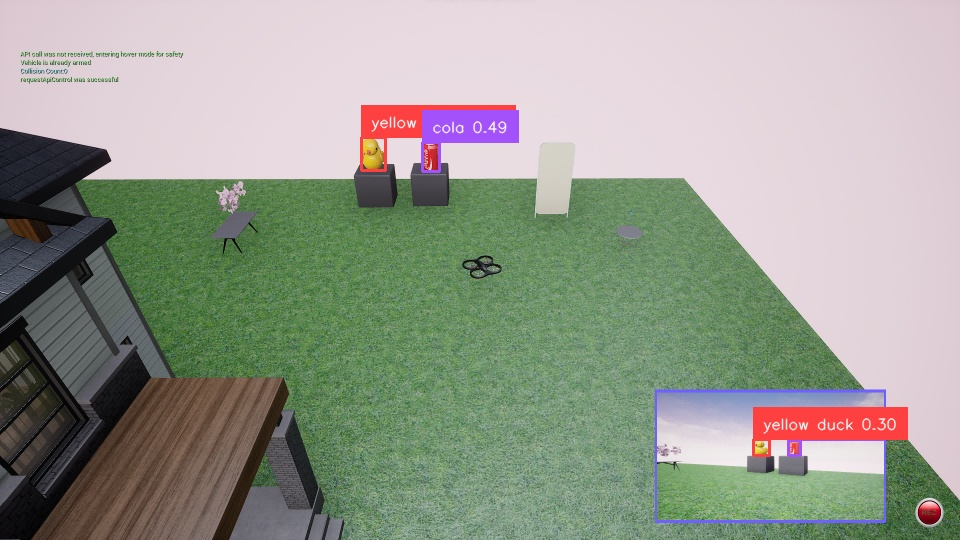

In [3]:
from IPython.display import display # type: ignore
from PIL import Image
img_path = "./img/annotated_image.jpg"
image_pil = Image.open(img_path)
display(image_pil)

## opencv读取

In [45]:
import cv2 # type: ignore
local_image_path = ".img/p-4-1-s.png"
image = cv2.imread(local_image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [46]:
import uuid
bgr_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR)
# 2. 生成随机文件名（含扩展名）
file_name = f"random_{uuid.uuid4().hex}.png"  # 示例输出：random_1a2b3c4d5e.png
cv2.imwrite(file_name, bgr_image)

True

In [47]:
task = create_task_with_local_image_auto_resize(
    api_path="/v2/task/dinox/detection",
    api_body_without_image={
        "model": "DINO-X-1.0",
        # "image": infer_image_url, # not needed for local image
        "prompt": {
            "type": "text",
            "text": "yellow duck.Cola"
        },
        "targets": ["bbox"],
        "bbox_threshold": 0.25,
        "iou_threshold": 0.8
    },
    image_path="./img/"+file_name)

# 3. Run the task.
# task.set_request_timeout(10)  # set the request timeout in seconds，default is 5 seconds
client.run_task(task)

In [55]:
results=task.result
results

{'objects': [{'bbox': [361.0107727050781,
    137.81129455566406,
    385.2979431152344,
    170.25906372070312],
   'category': 'yellow duck',
   'score': 0.5245164632797241},
  {'bbox': [422.27630615234375,
    142.6351776123047,
    439.4619140625,
    171.25196838378906],
   'category': 'Cola',
   'score': 0.4930424094200134},
  {'bbox': [788.823974609375,
    440.6143493652344,
    800.92138671875,
    455.17333984375],
   'category': 'Cola',
   'score': 0.33111974596977234},
  {'bbox': [753.3982543945312,
    439.9850158691406,
    769.3515625,
    455.8874206542969],
   'category': 'yellow duck',
   'score': 0.29665425419807434}]}